In [23]:
import os
print(os.environ["PYTHONPATH"])  # Should contain parent dirrectory of image_captioning module

/home/k/retail


In [24]:
import json

import pandas as pd
import numpy as np
import editdistance
import matplotlib.pyplot  as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

import torch

import image_captioning.constants as C
from image_captioning.caption import caption_image_beam_search, visualize_att

In [25]:
with open("metrics.json") as f:
    metrics = json.load(f)
train_metrics = pd.DataFrame(metrics["train"])
train_metrics.columns = ["train_" + c for c in train_metrics.columns]
val_metrics = pd.DataFrame(metrics["val"])
val_metrics.columns = ["val_" + c for c in val_metrics.columns]
metrics = train_metrics.join(val_metrics)
metrics.head()

,train_error,train_losses,val_edit,val_error,val_losses,val_norm_edit
0,0.647121,3.030246,1.831313,0.577046,2.756841,0.567849
1,0.578848,2.726355,1.689867,0.533101,2.600158,0.522192
2,0.540182,2.601405,1.610986,0.508676,2.529502,0.501961
3,0.494211,2.461901,1.444993,0.455724,2.333380,0.441658
4,0.454694,2.350225,1.377488,0.434317,2.297018,0.429157


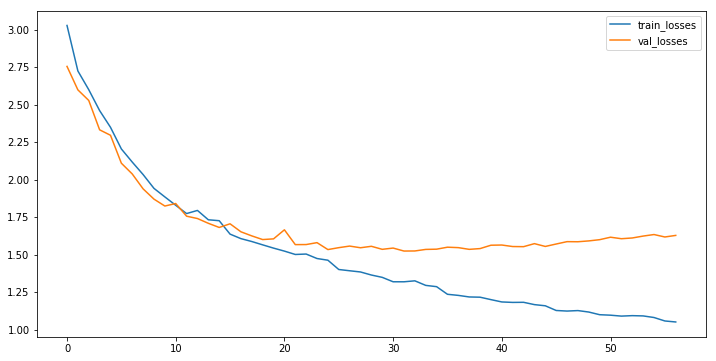

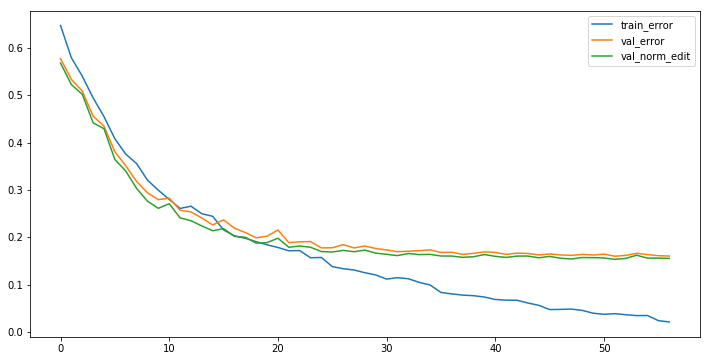

In [26]:
metrics[["train_losses", "val_losses"]].plot(figsize=(12,6))
metrics[["train_error", "val_error", "val_norm_edit"]].plot(figsize=(12,6))